# <center>Image Classification based on the Fashion M-Nist Dataset </center>

## <center>Executive Summary </center>

* Description of Data
* Choice of model
* Description of methods
* Summary of Results

### Import Libraries

In [57]:
#utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Model
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

### Import Data

In [18]:
# Import Fashion M-Nist as per keras documentation
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [19]:
# check the shape of the imports
print("X Train Shape: {}".format(x_train.shape))
print("Y Train Shape: {}".format(y_train.shape))
print("X Test Shape: {}".format(x_test.shape))
print("Y Test Shape: {}".format(y_test.shape))

X Train Shape: (60000, 28, 28)
Y Train Shape: (60000,)
X Test Shape: (10000, 28, 28)
Y Test Shape: (10000,)


Label	Description as per fashion m-nist:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot
  
  
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

In [20]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

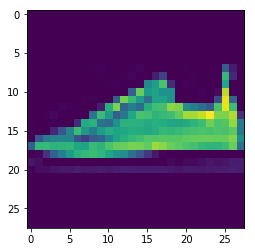

In [25]:
plt.imshow(x_train[np.random.randint(0,59999)])

In [49]:
def show_images(x,y):
    """Select 4 random images and display them along with their class
    -better way would be to have a parameter to select sample size and use a loop."""
    fig,ax=plt.subplots(2,2,figsize=(10,10))
    ind1=np.random.randint(0,50000)
    ind2=np.random.randint(0,50000)
    ind3=np.random.randint(0,50000)
    ind4=np.random.randint(0,50000)
    ax[0,0].imshow(x[ind1])
    ax[0,0].set_title(fashion_mnist_labels[y[ind1]])
    ax[0,1].imshow(x[ind2])
    ax[0,1].set_title(fashion_mnist_labels[y[ind2]])
    ax[1,0].imshow(x[ind3])
    ax[1,0].set_title(fashion_mnist_labels[y[ind3]])
    ax[1,1].imshow(x[ind4])
    ax[1,1].set_title(fashion_mnist_labels[y[ind4]])    

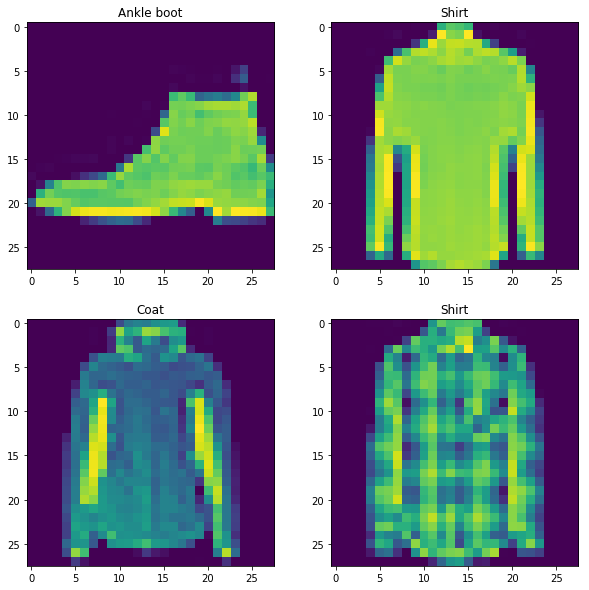

In [51]:
# Random sample of images
show_images(x_train,y_train)

* Check balance on classes!

### Pre Processing

In [54]:
# Reshape the input data to one usable by the model
img_row = 28
img_col = 28
channel = 1
nclasses = 10

# Images
x_train = x_train.reshape(x_train.shape[0],img_row,img_col,channel)
x_test  = x_test.reshape(x_test.shape[0],img_row,img_col,channel)

# One hot encoding of the the target classes
y_train = to_categorical(y_train,num_classes=nclasses)
y_test = to_categorical(y_test,num_classes=nclasses)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# Print test set shape
print("x_test shape:", x_train.shape, "y_test shape:", y_train.shape)

x_train shape: (60000, 28, 28, 1) y_train shape: (60000, 10)
x_test shape: (60000, 28, 28, 1) y_test shape: (60000, 10)


### Model

Set up model architecture

In [58]:
model = Sequential()

# Must define the input shape in the first layer of the neural network
#Input Layer, First Convolutional layer
model.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 

# First Max Pooling Layer
model.add(MaxPooling2D(pool_size=2))
# First Dropout Layer
model.add(Dropout(0.3))

# Second convolutional layer
model.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))

# Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=2))
# Second Dropout Layer
model.add(Dropout(0.3))

# Flattening Layer
model.add(Flatten())

# First Dense layer
model.add(Dense(256, activation='relu'))

# Third dropout layer
model.add(Dropout(0.5))

# Output Layer. 10 units since there are 10 classes. Softmax activation for probalilities
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

Compile Model

In [61]:
# Specificy loss function, optimizer and metrics to tune model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Train the model

In [ ]:
checkpointer = ModelCheckpoint(filepath='model_best.hdf5', verbose = 1, save_best_only=True)
#This saves the best model with so it can be used later without retraining

model.fit(x_train,
         y_train,
         batch_size=100,
         epochs=3,
         validation_split = 0.2,
         callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 120s 3ms/step - loss: 0.5940 - acc: 0.7807 - val_loss: 0.4212 - val_acc: 0.8490

Epoch 00001: val_loss improved from inf to 0.42118, saving model to model_best.hdf5
Epoch 2/3
48000/48000 [==============================] - 116s 2ms/step - loss: 0.5017 - acc: 0.8131 - val_loss: 0.3849 - val_acc: 0.8629

Epoch 00002: val_loss improved from 0.42118 to 0.38494, saving model to model_best.hdf5
Epoch 3/3
27500/48000 [================>.............] - ETA: 48s - loss: 0.4698 - acc: 0.8243

Load weights with best accuracy

In [23]:
# Load the weights with the best validation accuracy
model.load_weights('model_best.hdf5')

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for model.weights.best.hdf5

Test Accuracy

In [24]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8914


In [27]:
y_pred = model.predict(x_test)

In [32]:
print(accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

0.8914


In [38]:
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[873   0  10  10   5   1  96   0   5   0]
 [  1 980   0  12   2   0   3   0   2   0]
 [ 14   1 754   8 159   0  64   0   0   0]
 [ 20   8  10 896  27   0  37   0   2   0]
 [  1   1  65  31 847   0  54   0   1   0]
 [  0   0   0   0   0 980   0  13   0   7]
 [139   1  70  27  88   0 667   0   8   0]
 [  0   0   0   0   0   8   0 969   0  23]
 [  2   1   0   3   5   0   7   1 979   2]
 [  0   0   1   0   0   3   0  27   0 969]]


In [34]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.83      0.87      0.85      1000
          1       0.99      0.98      0.98      1000
          2       0.83      0.75      0.79      1000
          3       0.91      0.90      0.90      1000
          4       0.75      0.85      0.79      1000
          5       0.99      0.98      0.98      1000
          6       0.72      0.67      0.69      1000
          7       0.96      0.97      0.96      1000
          8       0.98      0.98      0.98      1000
          9       0.97      0.97      0.97      1000

avg / total       0.89      0.89      0.89     10000

